# What target should we use:
* Imagine that we can perfectly predict a certain target.
* Can we come out with a trading strategy based on this model?
* How often and accurate do we need to be able to do this?

In [1]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [2]:
import pandas as pd

In [3]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday/IBM_adjusted.txt', header=None, names=names)
df['DateTime']= pd.to_datetime((df.Date+' '+df.Time),infer_datetime_format=True) 
df = df.set_index('DateTime')

dg = pd.read_csv('data/sampleKibotData/minuteIntraday/OIH_adjusted.txt', header=None, names=names)
dg['DateTime']= pd.to_datetime((dg.Date+' '+dg.Time),infer_datetime_format=True) 
dg = dg.set_index('DateTime')

s1 = (df.High+df.Low)/2
s2 = (dg.High+dg.Low)/2

In [4]:
s1.shape

(2288289,)

In [5]:
ds = pd.concat([s1, s2], axis=1)
ds = ds.dropna(how='any')
ds.columns = ['IBM', 'IOH']

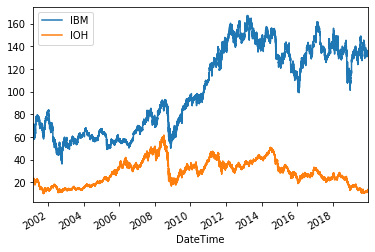

In [6]:
ds.plot()

In [7]:
s2.head()

DateTime
2001-02-26 09:41:00    20.48
2001-02-26 09:44:00    20.56
2001-02-26 09:46:00    20.64
2001-02-26 10:14:00    20.84
2001-02-26 10:18:00    20.96
dtype: float64

In [8]:
s = pd.Series([2,4,8,16,32])
s.pct_change()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [9]:
ds

,IBM,IOH
DateTime,,
2001-02-26 09:41:00,69.7900,20.4800
2001-02-26 09:44:00,69.6350,20.5600
2001-02-26 09:46:00,69.2400,20.6400
2001-02-26 10:14:00,68.4900,20.8400
2001-02-26 10:18:00,68.3100,20.9600
...,...,...
2019-12-27 15:56:00,135.2675,13.3075
2019-12-27 15:57:00,135.2500,13.3000
2019-12-27 15:58:00,135.2500,13.3050


In [49]:
ds['increaseIBM'] = (1+ds.IBM.pct_change()).fillna(100)
ds['increaseIOH'] = (1+ds.IOH.pct_change()).fillna(100)
ds['increaseGOD'] = ds.apply(lambda x: max(x.increaseIBM, x.increaseIOH), axis=1)
ds['positionGOD'] = ds.apply(lambda x: 'IBM' if x.increaseIBM>x.increaseIOH else 'IOH', axis=1)

In [111]:
### this should be implemented as clear as possible!

transactionCost = 0.01
GOD = []
numStocksGOD = []
feesGOD=[]
IBM = list(ds.IBM)
IOH = list(ds.IOH)
positionGOD = list(ds.positionGOD)
increaseGOD = list(ds.increaseGOD)

GOD.append(100) #GOD starts with 100, as usual
numStocksGOD.append(GOD[-1]/(IBM[0] if positionGOD[0]=='IBM' else IOH[0]))
feesGOD.append(numStocksGOD[-1]* transactionCost)


for i in range(1, len(IBM)):
    feesGOD.append(numStocksGOD[-1]* transactionCost if positionGOD[i]!=positionGOD[i-1] else 0)
    GOD.append(GOD[-1]*increaseGOD[i]-feesGOD[-1])
    numStocksGOD.append(GOD[-1]/(IBM[0] if positionGOD[i]=='IBM' else IOH[i]))
    
    
ds['GOD'] = GOD
ds['numStocksGOD'] = numStocksGOD
ds['feesGOD']=feesGOD

In [109]:
ds.head()

,IBM,IOH,increaseIBM,increaseIOH,increaseGOD,positionGOD,GOD,numStocksGOD,feesGOD
DateTime,,,,,,,,,
2001-02-26 09:41:00,69.790,20.48,100.000000,100.000000,100.000000,IOH,100.000000,4.882812,0.048828
2001-02-26 09:44:00,69.635,20.56,0.997779,1.003906,1.003906,IOH,100.390625,4.882812,0.000000
2001-02-26 09:46:00,69.240,20.64,0.994328,1.003891,1.003891,IOH,100.781250,4.882812,0.000000
2001-02-26 10:14:00,68.490,20.84,0.989168,1.009690,1.009690,IOH,101.757812,4.882812,0.000000
2001-02-26 10:18:00,68.310,20.96,0.997372,1.005758,1.005758,IOH,102.343750,4.882812,0.000000


In [110]:
print(len(GOD))
print(len(numStocksGOD))
print(len(feesGOD))

1667869
1667869
1667869


In [107]:
ds

,IBM,IOH,increaseIBM,increaseIOH,increaseGOD,positionGOD,GOD,numStocksGOD,feesGOD
DateTime,,,,,,,,,
2001-02-26 09:41:00,69.7900,20.4800,100.000000,100.000000,100.000000,IOH,1.000000e+02,4.882812e+00,4.882812e-02
2001-02-26 09:44:00,69.6350,20.5600,0.997779,1.003906,1.003906,IOH,1.003906e+02,4.882812e+00,0.000000e+00
2001-02-26 09:46:00,69.2400,20.6400,0.994328,1.003891,1.003891,IOH,1.007812e+02,4.882812e+00,0.000000e+00
2001-02-26 10:14:00,68.4900,20.8400,0.989168,1.009690,1.009690,IOH,1.017578e+02,4.882812e+00,0.000000e+00
2001-02-26 10:18:00,68.3100,20.9600,0.997372,1.005758,1.005758,IOH,1.023438e+02,4.882812e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
2019-12-27 15:56:00,135.2675,13.3075,1.000129,0.999437,1.000129,IBM,4.621533e+129,6.622056e+127,3.473081e+126
2019-12-27 15:57:00,135.2500,13.3000,0.999871,0.999436,0.999871,IBM,4.620935e+129,6.621200e+127,0.000000e+00
2019-12-27 15:58:00,135.2500,13.3050,1.000000,1.000376,1.000376,IOH,4.622010e+129,3.473890e+128,6.621200e+125


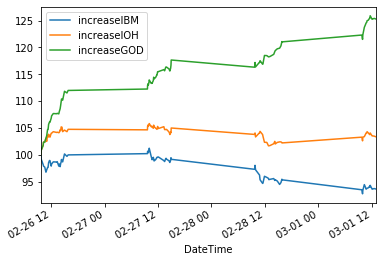

In [54]:
ds[['increaseIBM', 'increaseIOH', 'increaseGOD']][:100].cumprod().plot()

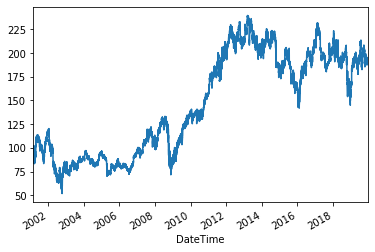

In [34]:
ds.increaseIBM.cumprod().plot()

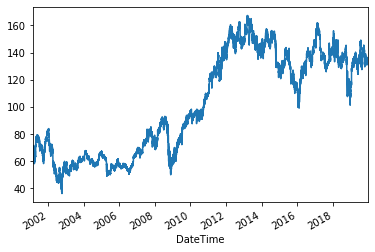

In [35]:
ds.IBM.plot()

In [36]:
ds.IBM.values[0]

69.78999999999999